In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os,sys
import PIL
import tensorflow as tf
import cv2 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from PIL import Image 

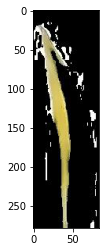

In [11]:
full_dir = "E:/User Document/DIl Proj/DataSet"
p = os.listdir(full_dir+'/PhosphorusLow')
n = os.listdir(full_dir+'/NitrogenLow')
k = os.listdir(full_dir+'/PotassiumLow')
ph = os.listdir(full_dir+'/PhosphorusHigh')
nh = os.listdir(full_dir+'/NitrogenHigh')
kh = os.listdir(full_dir+'/PotassiumHigh')


nlist=[]
plist=[]
klist=[]
nhlist=[]
phlist=[]
khlist=[]

for ne in n  :
    nlist.append(os.path.join(full_dir+"/NitrogenLow",ne))

for ne in p  :
    plist.append(os.path.join(full_dir+"/PhosphorusLow",ne))
for ne in k  :
    klist.append(os.path.join(full_dir+"/PotassiumLow",ne))
for ne in nh :
    nhlist.append(os.path.join(full_dir+"/NitrogenHigh",ne))
for ne in ph :
    phlist.append(os.path.join(full_dir+"/PhosphorusHigh",ne))
for ne in kh :
    khlist.append(os.path.join(full_dir+"/PotassiumHigh",ne))
print()
    
#plt.imshow(nlist[0].numpy().astype("uint8"));

from matplotlib import pyplot as plt
from PIL import Image # importing image module 
import numpy as np 
import imageio
import matplotlib.pyplot as plt
from PIL import Image





im1 = imageio.imread(plist[0]) 

#th, dst = cv2.threshold(im1, 0, 25, cv2.THRESH_BINARY);

#print(im1.shape)
plt.imshow(im1)
plt.show()


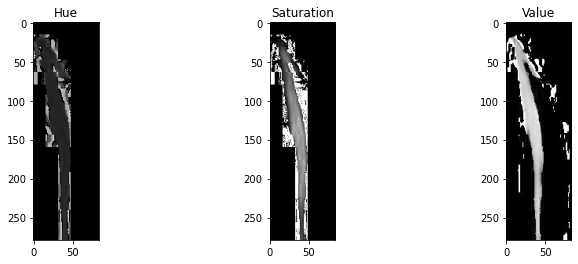

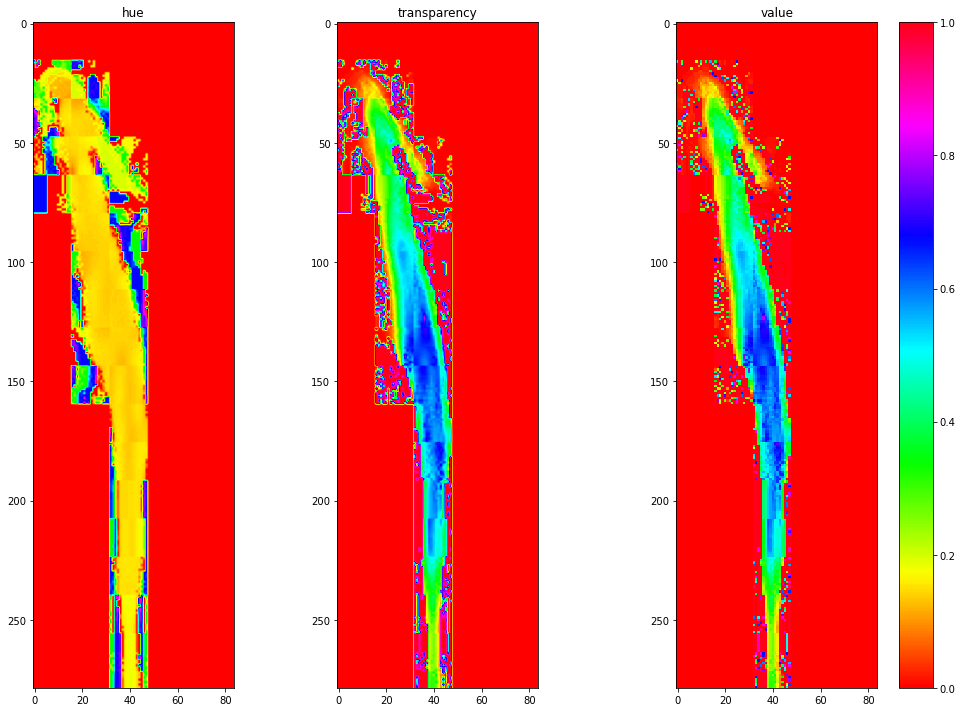

In [12]:

from skimage.io import imread, imshow
from skimage.color import rgb2hsv

bags_hsv = rgb2hsv(im1)
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(bags_hsv[:,:,0], cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(bags_hsv[:,:,1], cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(bags_hsv[:,:,2], cmap='gray')
ax[2].set_title('Value');



fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(bags_hsv[:,:,0],cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(bags_hsv[:,:,1],cmap='hsv')
ax[1].set_title('transparency')
ax[2].imshow(bags_hsv[:,:,2],cmap='hsv')
ax[2].set_title('value')
fig.colorbar(imshow(bags_hsv[:,:,1],cmap='hsv')) 
fig.tight_layout()


batch_size = 32
img_height = 180
img_width = 180

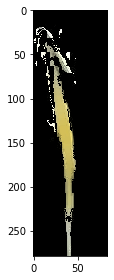

In [15]:

#refer to hue channel (in the colorbar)
lower_mask = bags_hsv[:,:,0] > 0.1 #refer to hue channel (in the colorbar)
upper_mask = bags_hsv[:,:,0] < 0.5 #refer to transparency channel (in the colorbar)
saturation_mask = bags_hsv[:,:,1] > 0.4 
 
mask = upper_mask*lower_mask*saturation_mask
red = im1[:,:,0]*mask
green = im1[:,:,1]*mask
blue = im1[:,:,2]*mask
bags_masked = np.dstack((red,green,blue))
imshow(bags_masked)



#refer to hue channel (in the colorbar)
lower_mask = bags_hsv[:,:,0] > 0.15 #refer to hue channel (in the colorbar)
upper_mask = bags_hsv[:,:,0] < 0.2 #refer to transparency channel (in the colorbar)
saturation_mask = bags_hsv[:,:,1] > 0
mask1 =upper_mask*lower_mask*saturation_mask
mask2 = mask1+ mask
red = im1[:,:,0]*mask2
green = im1[:,:,1]*mask2
blue = im1[:,:,2]*mask2
asd =mask+mask2
bags_masked = np.dstack((red,green,blue))
x=cv2.fastNlMeansDenoisingColored(bags_masked,None,10,10,7,21)
imshow(x)

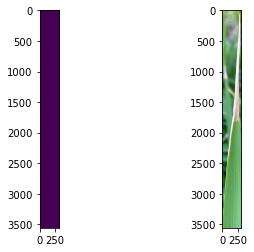

In [9]:

#leaf_nemo = cv2.cvtColor(im1, cv2.COLOR_RGB2HSV);
leaf_nemo = im1
affectedColorHigh = (117,204,151)
affectedColorLow = (106,188,152)

leafColor = (18, 255, 255)

mask = cv2.inRange(leaf_nemo, affectedColorLow, affectedColorHigh)


result = cv2.bitwise_and(im1, im1, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask)
plt.subplot(1, 2, 2)
plt.imshow(leaf_nemo)
plt.show()


def viewImage(image):
    plt.show(image)
    #cv2.namedWindow('Display', cv2.WINDOW_NORMAL)
    #cv2.imshow('Display', image)
   # cv2.waitKey(0)
    #cv2.destroyAllWindows()

In [ ]:

    
## getting green HSV color representation
green = np.uint8([[[0, 255, 0 ]]])
green_hsv = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print( green_hsv)

image =  im1
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
viewImage(hsv_img) ## 1green_low = np.array([45 , 100, 50] )
green_high = np.array([75, 255, 255])
curr_mask = cv2.inRange(hsv_img, green_low, green_high)
hsv_img[curr_mask > 0] = ([75,255,200])
viewImage(hsv_img) ## 2## converting the HSV image to Gray inorder to be able to apply 
## contouring
RGB_again = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
viewImage(gray) ## 3ret, threshold = cv2.threshold(gray, 90, 255, 0)
viewImage(threshold) ## 4contours, hierarchy =  cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours, -1, (0, 0, 255), 3)
viewImage(image) ## 5


Found 1101 files belonging to 6 classes.
Using 991 files for training.
Found 1101 files belonging to 6 classes.
Using 110 files for validation.
['NitrogenHigh', 'NitrogenLow', 'PhosphorusHigh', 'PhosphorusLow', 'PotassiumHigh', 'PotassiumLow']


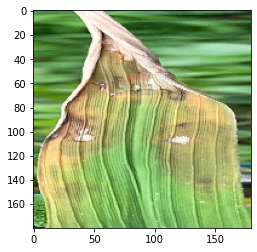

In [10]:

train_ds = tf.keras.utils.image_dataset_from_directory(
  full_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  full_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)

import matplotlib.pyplot as plt

#plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    #ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    #plt.axis("off")

In [86]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [95]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [96]:
normalization_layer = layers.Rescaling(1./255)

In [97]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image)) 



data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])


0.0 1.0


In [98]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])




In [99]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [100]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)       

In [101]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
31/31 [==============================] - 11s 323ms/step - loss: 2.0838 - accuracy: 0.1937 - val_loss: 1.7799 - val_accuracy: 0.1818
Epoch 2/10
31/31 [==============================] - 8s 270ms/step - loss: 1.7878 - accuracy: 0.2048 - val_loss: 1.7861 - val_accuracy: 0.2182
Epoch 3/10
31/31 [==============================] - 8s 267ms/step - loss: 1.7676 - accuracy: 0.2250 - val_loss: 1.7393 - val_accuracy: 0.1818
Epoch 4/10
31/31 [==============================] - 8s 271ms/step - loss: 1.6704 - accuracy: 0.2624 - val_loss: 1.5358 - val_accuracy: 0.3727
Epoch 5/10
31/31 [==============================] - 8s 275ms/step - loss: 1.5431 - accuracy: 0.3269 - val_loss: 1.5550 - val_accuracy: 0.3364
Epoch 6/10
31/31 [==============================] - 9s 281ms/step - loss: 1.4141 - accuracy: 0.4016 - val_loss: 1.3774 - val_accuracy: 0.4636
Epoch 7/10
31/31 [==============================] - 9s 285ms/step - loss: 1.3123 - accuracy: 0.4662 - val_loss: 1.2113 - val_accuracy: 0.4727
Epoch

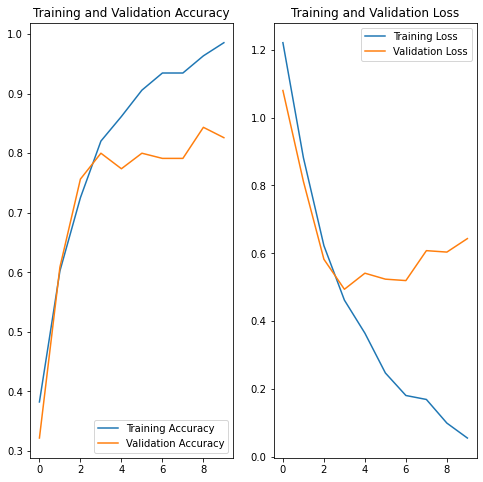

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()





def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(180, 180))
    #img = img1.Rescaling(1./255, input_shape=(img_height, img_width, 3))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 1./255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


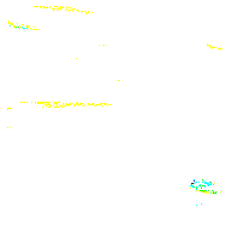

[[-117.438194 -362.72263   270.4138  ]]


In [108]:

img = load_image(klist[0], True)
#predict = model.predict(img)
print(model.predict(img))
